In [4]:
import pandas as pd

In [55]:
import matplotlib.pyplot as plt
# темплейты отсюда https://habr.com/ru/post/468295/

In [6]:
df = pd.read_csv('all-schools.csv')
df.head()

C:\Users\Swl\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (312) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,UnitID,Institution Name,State abbreviation (HD2017),Sector of institution (HD2017),Degree-granting status (HD2017),Degree of urbanization (Urban-centric locale) (HD2017),Percent paying sticker price,Institution (entity) name (HD2017),Institution name alias (HD2017),City location of institution (HD2017),...,Students from the part-time adjusted fall 2014 cohort enrolled in fall 2015 (EF2015D_RV),Part-time adjusted fall 2014 cohort (EF2015D_RV),Students from the full-time adjusted fall 2013 cohort enrolled in fall 2014 (EF2014D_RV),Full-time adjusted fall 2013 cohort (EF2014D_RV),Students from the part-time adjusted fall 2013 cohort enrolled in fall 2014 (EF2014D_RV),Part-time adjusted fall 2013 cohort (EF2014D_RV),Students from the full-time adjusted fall 2012 cohort enrolled in fall 2013 (EF2013D_RV),Full-time adjusted fall 2012 cohort (EF2013D_RV),Students from the part-time adjusted fall 2012 cohort enrolled in fall 2013 (EF2013D_RV),Part-time adjusted fall 2012 cohort (EF2013D_RV)
0,491394.0,Edge Tech Academy,TX,9.0,2.0,21.0,NaN,Edge Tech Academy,NaN,Hurst,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,491303.0,University of Wisconsin Colleges Flex,WI,4.0,1.0,11.0,NaN,University of Wisconsin Colleges Flex,NaN,Madison,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,491297.0,University of Wisconsin-Parkside Flex,WI,1.0,2.0,22.0,100.0,University of Wisconsin-Parkside Flex,NaN,Kenosha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,491288.0,University of Wisconsin-Milwaukee Flex,WI,1.0,1.0,11.0,100.0,University of Wisconsin-Milwaukee Flex,NaN,Milwaukee,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,491242.0,Johnny Matthew's Hairdressing Training School,OR,9.0,2.0,12.0,NaN,Johnny Matthew's Hairdressing Training School,NaN,Salem,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.columns

Index(['UnitID', 'Institution Name', 'State abbreviation (HD2017)',
       'Sector of institution (HD2017)', 'Degree-granting status (HD2017)',
       'Degree of urbanization (Urban-centric locale) (HD2017)',
       'Percent paying sticker price', 'Institution (entity) name (HD2017)',
       'Institution name alias (HD2017)',
       'City location of institution (HD2017)',
       ...
       'Students from the part-time adjusted fall 2014 cohort enrolled in fall 2015 (EF2015D_RV)',
       'Part-time adjusted fall 2014 cohort (EF2015D_RV)',
       'Students from the full-time adjusted fall 2013 cohort enrolled in fall 2014 (EF2014D_RV)',
       'Full-time adjusted fall 2013 cohort (EF2014D_RV)',
       'Students from the part-time adjusted fall 2013 cohort enrolled in fall 2014 (EF2014D_RV)',
       'Part-time adjusted fall 2013 cohort (EF2014D_RV)',
       'Students from the full-time adjusted fall 2012 cohort enrolled in fall 2013 (EF2013D_RV)',
       'Full-time adjusted fall 2012 coh

In [10]:
dff = pd.read_csv('tuition_cost.csv')
dff.head()

,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
0,Aaniiih Nakoda College,Montana,MT,Public,2 Year,NaN,2380,2380,2380,2380
1,Abilene Christian University,Texas,TX,Private,4 Year,10350.0,34850,45200,34850,45200
2,Abraham Baldwin Agricultural College,Georgia,GA,Public,2 Year,8474.0,4128,12602,12550,21024
3,Academy College,Minnesota,MN,For Profit,2 Year,NaN,17661,17661,17661,17661
4,Academy of Art University,California,CA,For Profit,4 Year,16648.0,27810,44458,27810,44458


In [11]:
dat = dff.loc[dff['degree_length']=='2 Year']

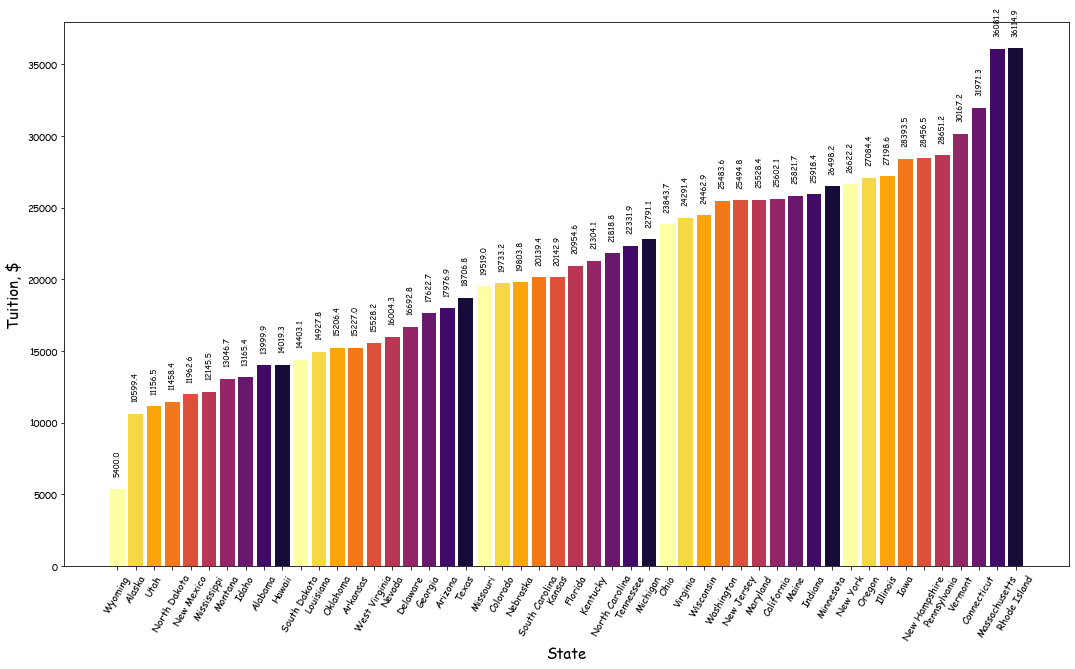

In [56]:
tui_by_state = dat.groupby('state')['in_state_tuition'].mean().sort_values()
fig, ax = plt.subplots(figsize=(18,10))
n_categories = 10
c = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]
plt.bar(tui_by_state.index, tui_by_state, color=c)
plt.setp(ax.get_xticklabels(), fontfamily='Comic Sans MS', rotation=60)
plt.setp(ax.get_yticklabels(), fontfamily='Comic Sans MS')
ax.set_xlabel("State", fontfamily='Comic Sans MS', size=15)
ax.set_ylabel("Tuition, $", fontfamily='Comic Sans MS', size=15)
for i, cty in enumerate(tui_by_state):
    ax.text(i, cty+1000, round(cty, 1), horizontalalignment='center', size=8, fontfamily='Comic Sans MS', rotation=90)
plt.savefig('bach_tui_by_state_bar.png')

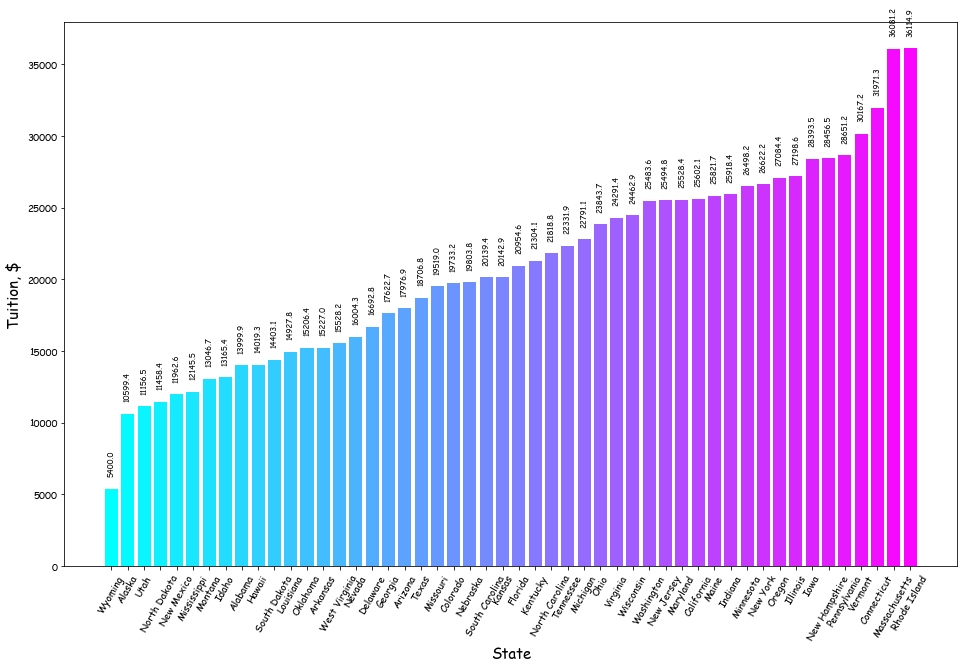

In [57]:
dat = dff.loc[dff['degree_length']=='4 Year']
n_categories = tui_by_state.shape[0]
c = [plt.cm.cool(i/float(n_categories)) for i in range(n_categories)]
tui_by_state = dat.groupby('state')['in_state_tuition'].mean().sort_values()
fig, ax = plt.subplots(figsize=(16,10))
plt.bar(tui_by_state.index, tui_by_state, color=c)
plt.setp(ax.get_xticklabels(), fontfamily='Comic Sans MS', rotation=60)
plt.setp(ax.get_yticklabels(), fontfamily='Comic Sans MS')
ax.set_xlabel("State", fontfamily='Comic Sans MS', size=15)
ax.set_ylabel("Tuition, $", fontfamily='Comic Sans MS', size=15)
for i, cty in enumerate(tui_by_state):
    ax.text(i, cty+1000, round(cty, 1), horizontalalignment='center', size=8, fontfamily='Comic Sans MS', rotation=90)
plt.savefig('mag_tui_by_state.png')

In [ ]:
pip install pywaffle

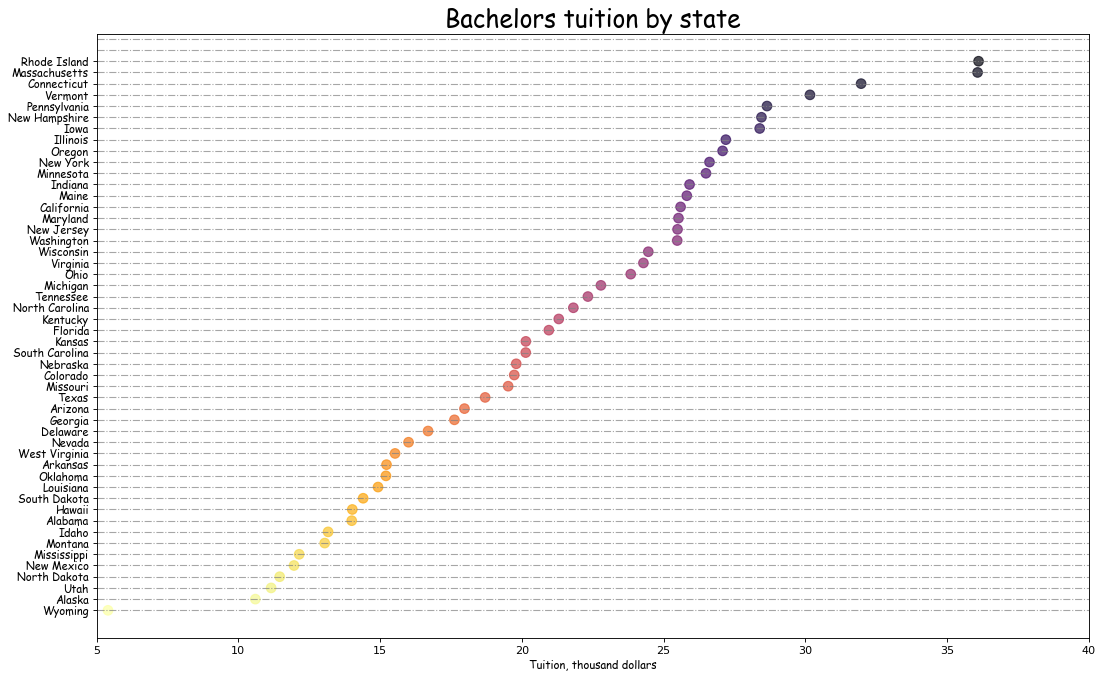

In [58]:
dat = dff.loc[dff['degree_length']=='4 Year']
tui_by_state = dat.groupby('state')['in_state_tuition'].mean().apply(lambda x: x/1000).sort_values()
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
n_categories = tui_by_state.shape[0]
c = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]
ax.hlines(y=df.index, xmin=5, xmax=40, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=tui_by_state.index, x=tui_by_state, s=75, color=c, alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Bachelors tuition by state', fontdict={'size':22}, fontfamily='Comic Sans MS')
ax.set_xlabel('Tuition, thousand dollars', fontfamily='Comic Sans MS')
ax.set_yticks(tui_by_state.index)
ax.set_yticklabels(tui_by_state.index, fontdict={'horizontalalignment': 'right'}, fontfamily='Comic Sans MS')
ax.set_xlim(5, 40)

plt.savefig('bach_tui_by_state.png')

In [53]:
d = df.rename(columns={'Institution Name':'name', 'Degree of urbanization (Urban-centric locale) (HD2017)':'urb', 'City location of institution (HD2017)':'city'})
d = d[['name', 'urb', 'city']]
# dff это tuition cost
d = d.merge(dff, on='name')

In [ ]:
plt.plot(d['urb'],d['in_state_tuition'], color='maroon')

In [36]:
ff = pd.read_csv('student_diversity.csv')
ff

,INSTITUTION,ENROLLMENT,WOMEN,AMERICAN INDIAN / ALASKA NATIVE,ASIAN,BLACK,HISPANIC,NATIVE HAWAIIAN / PACIFIC ISLANDER,WHITE,TWO OR MORE RACES,UNKNOWN,NON-\nRESIDENT FOREIGN,TOTAL MINORITY
0,U. of Phoenix-ArizonaArizona,"195,059","134,722",876,"1,959","31,455","13,984","1,019","58,209","19,039","65,163","3,355","68,332"
1,Ivy Tech Community College-Central IndianaIndiana,"91,179","53,476",357,"1,369","12,370","5,533",0,"61,498","1,804","8,224",24,"21,433"
2,Liberty U.Virginia,"81,459","48,329",447,856,"14,751","1,186",151,"39,062","1,772","22,198","1,036","19,163"
3,Lone Star College systemTexas,"69,395","41,268",168,"4,198","12,094","23,751",0,"23,615","1,997","2,273","1,299","42,208"
4,Miami Dade CollegeFlorida,"66,046","38,323",47,655,"10,722","44,870",41,"4,170",226,"1,927","3,388","56,561"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4600,ITT Technical Institute at West Covina (Calif....,8,4,0,0,0,8,0,0,0,0,0,8
4601,Danville Regional Medical Center School of Hea...,7,6,0,0,1,0,0,6,0,0,0,1
4602,Pace InstitutePennsylvania,5,2,0,0,1,2,0,1,1,0,0,4
4603,ITT Technical Institute at Germantown (Wis.)Wi...,4,2,0,0,2,0,0,2,0,0,0,2


In [37]:
peng = ff.loc[:,'AMERICAN INDIAN / ALASKA NATIVE':'NON-\nRESIDENT FOREIGN']
peng = peng.applymap(lambda x: round(int(''.join(x.split(',')))/10000))
peng = peng.sum(axis=0).sort_values(ascending=False)
peng

WHITE                                 739
HISPANIC                              175
BLACK                                  79
ASIAN                                  29
NON-\nRESIDENT FOREIGN                 24
UNKNOWN                                20
TWO OR MORE RACES                       2
AMERICAN INDIAN / ALASKA NATIVE         0
NATIVE HAWAIIAN / PACIFIC ISLANDER      0
dtype: int64

In [38]:
list(peng.index)

['WHITE',
 'HISPANIC',
 'BLACK',
 'ASIAN',
 'NON-\nRESIDENT FOREIGN',
 'UNKNOWN',
 'TWO OR MORE RACES',
 'AMERICAN INDIAN / ALASKA NATIVE',
 'NATIVE HAWAIIAN / PACIFIC ISLANDER']

C:\Users\Swl\anaconda3\lib\site-packages\pywaffle\waffle.py:276: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = self.add_subplot(loc, aspect="equal")


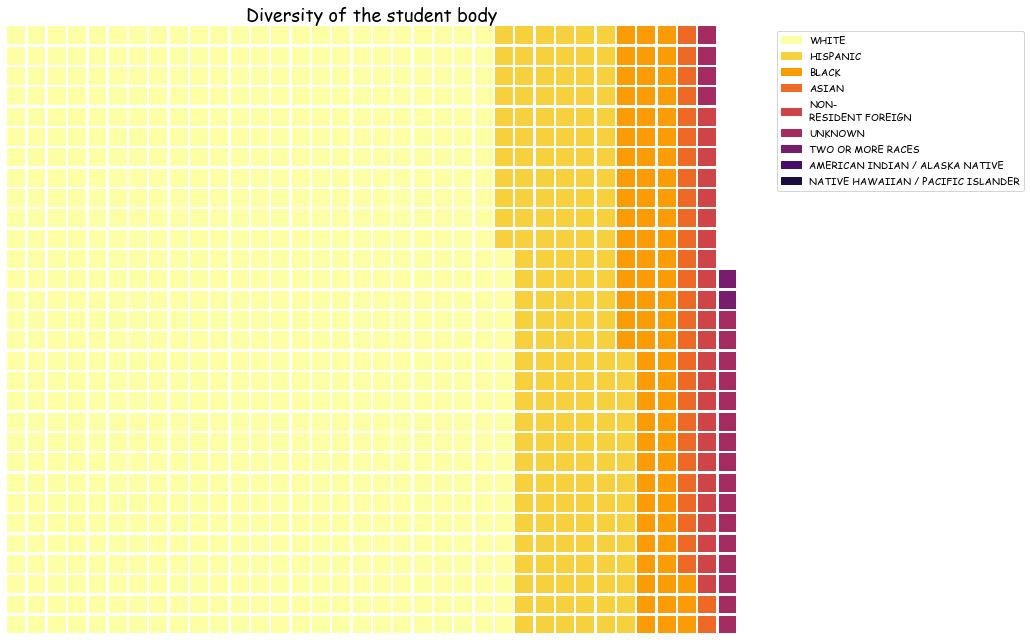

In [59]:
from pywaffle import Waffle
import matplotlib.font_manager as font_manager
font = font_manager.FontProperties(family='Comic Sans MS')

n_categories = peng.shape[0]
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '111': {
            'values': peng,
            'labels': list(peng.index),
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'prop':font},
            'title': {'label': 'Diversity of the student body', 'loc': 'center', 'fontsize':18, 'fontfamily':'Comic Sans MS'}
        },
    },
    rows=30,
    colors=colors,
    figsize=(16, 9)
)
plt.savefig('diversity.png')

In [54]:
# d = df.rename(columns={'Institution Name':'name', 'Degree of urbanization (Urban-centric locale) (HD2017)':'urb', 'City location of institution (HD2017)':'city'})
d = d.applymap(lambda x: str(x))
text = (' '.join(d['name'])).split()
states = set(d['state']).union(set(d['city']))
n_t=''
for w in text:
    if w not in states:
        n_t+=w + ' '   

In [37]:
# и тут вордклауд не установился, потому что ему не понравились properties моей винды - мы перенесли его к Саше на машину
import sys
!{sys.executable} -m pip install wordcloud
import numpy as np
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

clr = np.array(Image.open('conf.png'))  # маска, чтобы взять контур картинки
image_colors = ImageColorGenerator(clr)  # чтобы красить график в цвета картинки

wordcloud = WordCloud(
    background_color="white",
    color_func=image_colors,
    mask=clr,
    width = 2000,
    height = 2000,
    max_font_size=100,
    random_state=42,
).generate(n_t)

plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Облако слов (без стоп-слов)')
plt.show()

In [60]:
peng = dff['type'].value_counts()

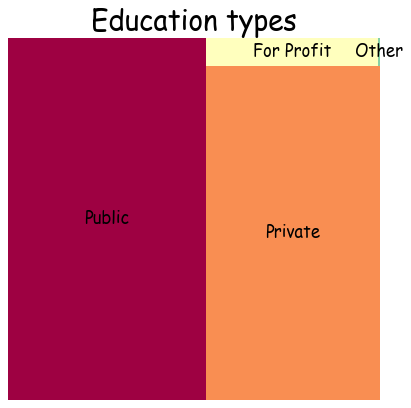

In [84]:
!pip install squarify
import squarify 

c = [plt.cm.Spectral(i/float(peng.shape[0])) for i in range(peng.shape[0])]

# Draw Plot
plt.figure(figsize=(6,6), dpi= 80)
squarify.plot(sizes=peng, label=peng.index, text_kwargs={'fontname':"Comic Sans MS", 'fontsize':15},color=c)

# Decorate
plt.title('Education types', family='Comic Sans MS', fontsize=25)
plt.axis('off')
plt.savefig('eds.png')